In [1]:
%matplotlib inline

In [2]:
from LoopStructural import GeologicalModel
from LoopStructural.datasets import load_claudius
from LoopStructural.visualisation import LavaVuModelViewer

import pandas as pd
import numpy as np



In [3]:
data, bb = load_claudius()
data = data.reset_index()

data.loc[:,'val']*=-1
data.loc[:,['nx','ny','nz']]*=-1


In [4]:
def view_model(model):
    
    viewer = LavaVuModelViewer(model)
    viewer.add_model(cmap='tab20')
    viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
    viewer.display()
    viewer.interactive()
    
    return

c:\users\asus\appdata\local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\asus\appdata\local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\asus\appdata\local\conda\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021-11-07 21:41:40,044 ~ LoopS


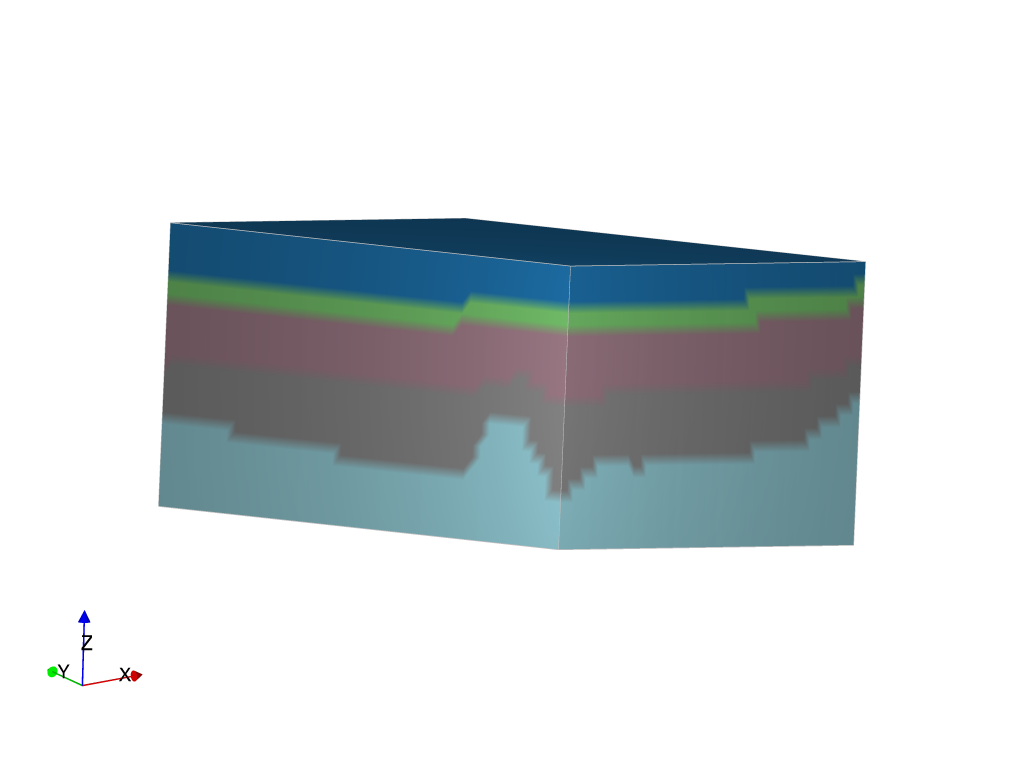

2021-11-07 21:41:42,236 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-07 21:41:42,236 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



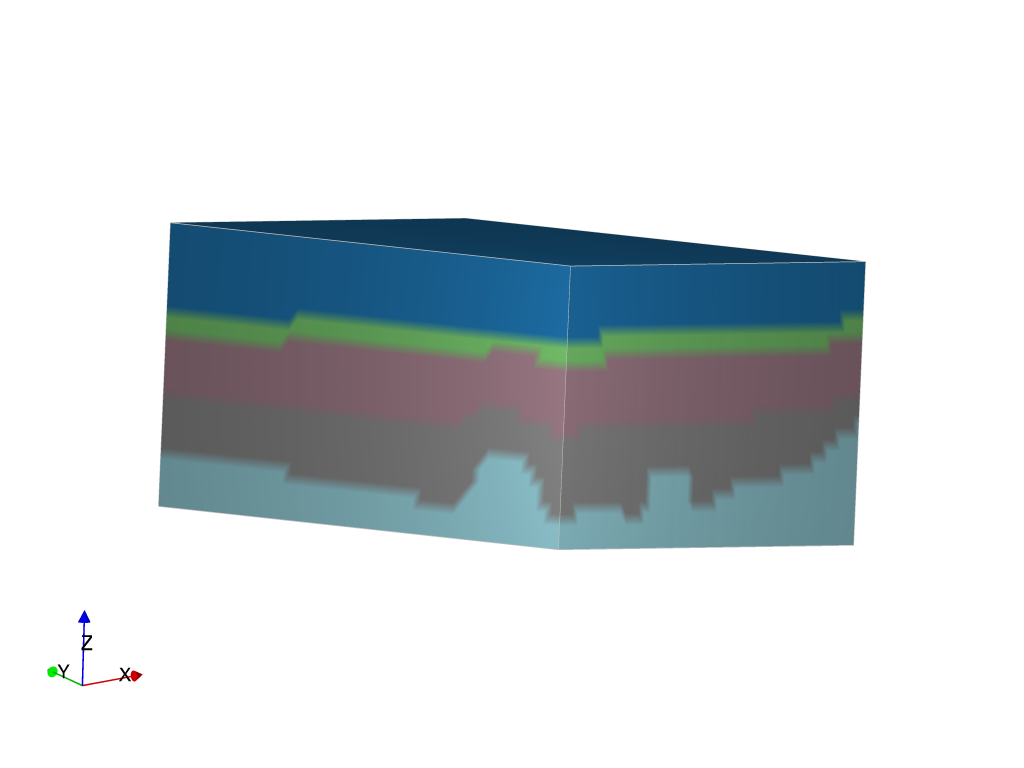

2021-11-07 21:41:43,878 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-07 21:41:43,878 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



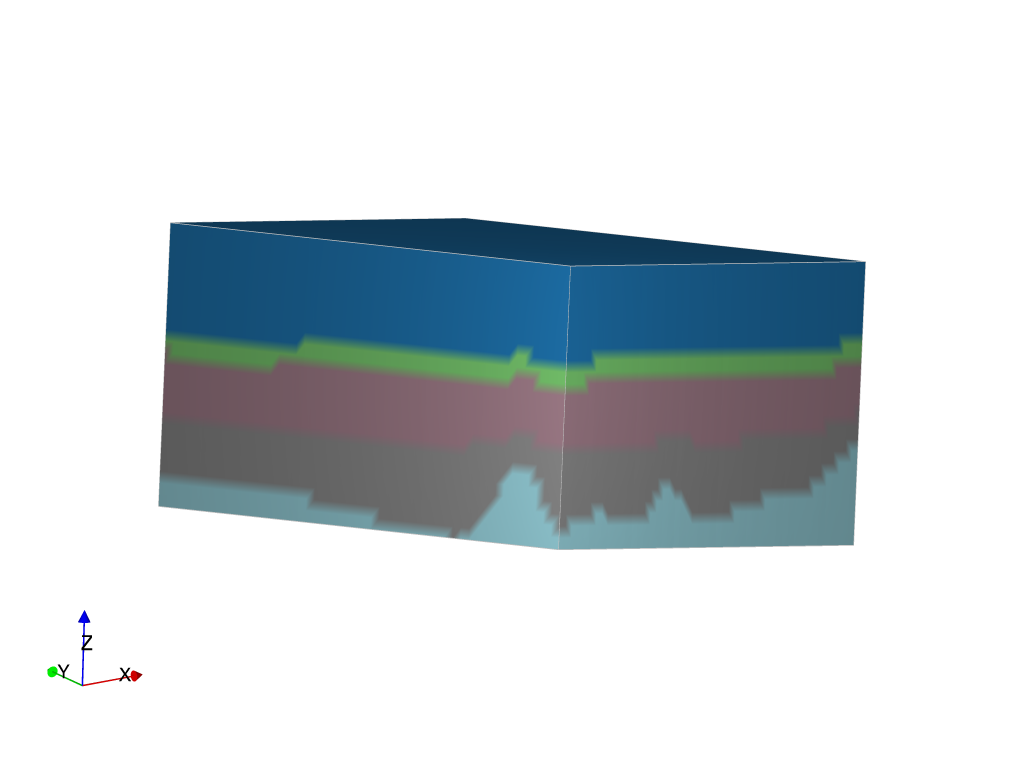

2021-11-07 21:41:45,524 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-07 21:41:45,524 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



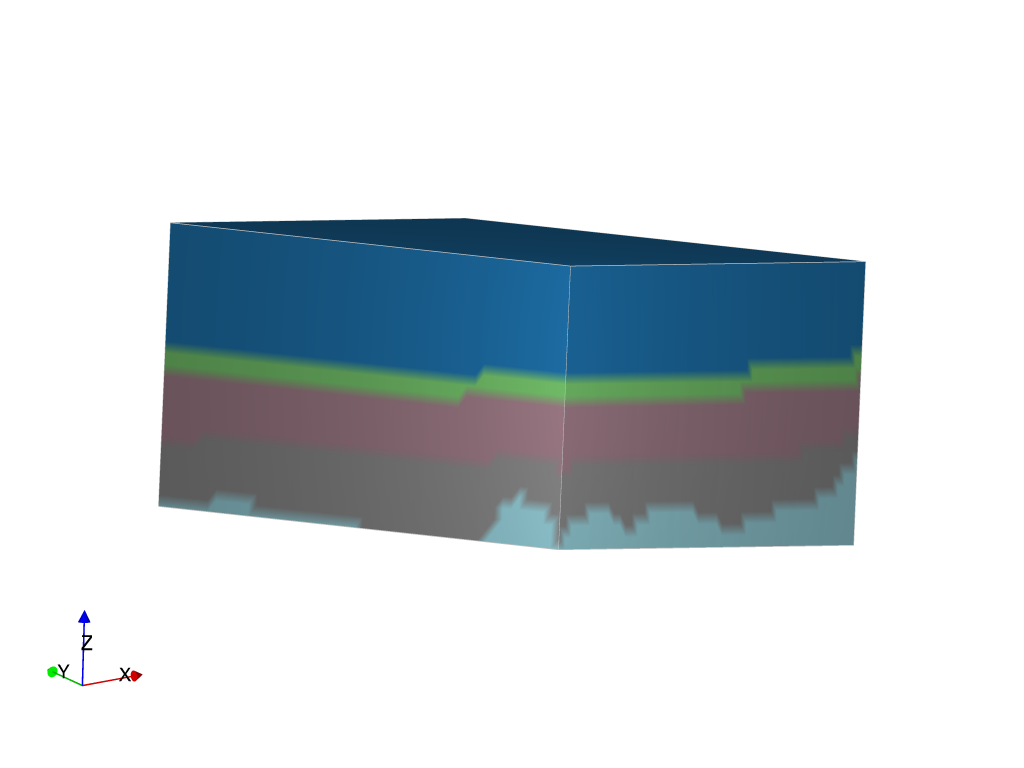

2021-11-07 21:41:46,953 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-07 21:41:46,953 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



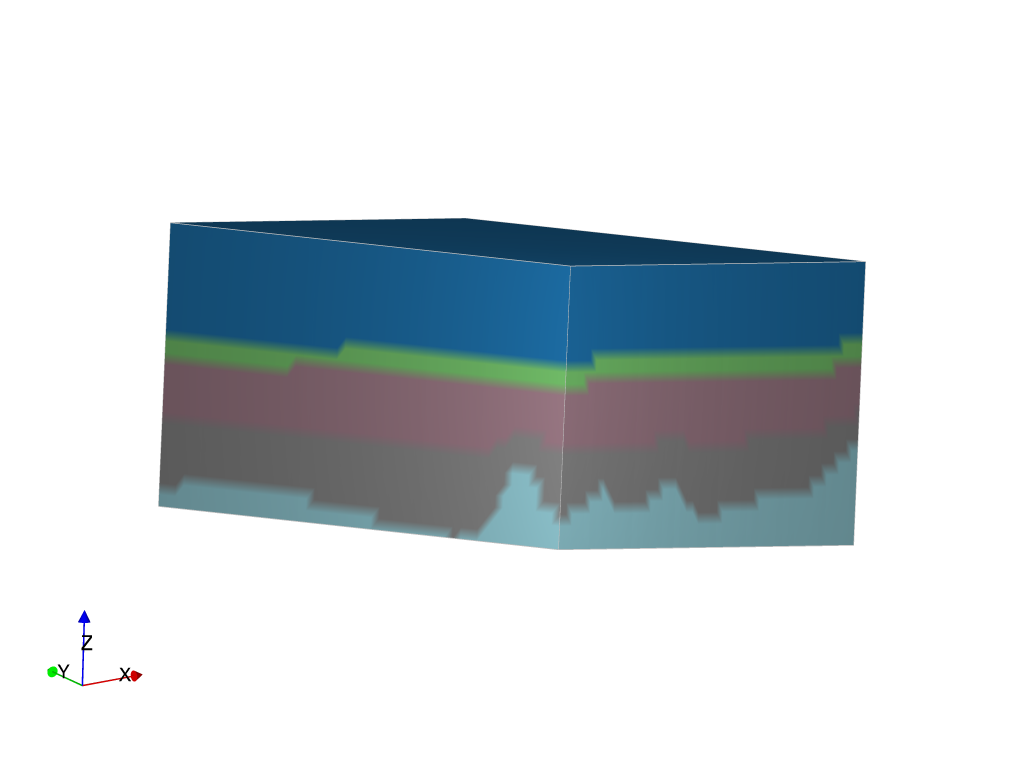

2021-11-07 21:41:48,639 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-07 21:41:48,639 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead


In [5]:


import pickle
#approach one
#assign uncertainty by looping through surfaces
surfaces = np.unique(data['feature_name'])

#mode = 1 -> uncertainties in x,y,z
#mode = 2 -> uncertainties in orientations
#mode = 3 -> combination

n_iterations = 6
np.random.seed(3)
lith_blocks = np.array([])

for iteration in range(n_iterations):
    for surf in surfaces:
        variance_z = np.random.normal(-100,100)
        variance_x = np.random.normal(-100,100)
        variance_y = np.random.normal(-100,100)
        data['Z'][data['feature_name'] == surf] = data['Z'][data['feature_name'] == surf] + variance_z
        data['X'][data['feature_name'] == surf] = data['X'][data['feature_name'] == surf] + variance_x
        data['Y'][data['feature_name'] == surf] = data['Y'][data['feature_name'] == surf] + variance_y
    


    model = GeologicalModel(bb[0,:],bb[1,:])
    model.set_model_data(data)



    strati_ = model.create_and_add_foliation('strati',
                              interpolatortype='PLI',
                               nelements=1e4,
                               solver='pyamg'
                              )


    stratigraphic_column = {}
    stratigraphic_column['strati'] = {}
    stratigraphic_column['strati']['unit2'] = {'min':-60,'max':0,'id':1}
    stratigraphic_column['strati']['unit3'] = {'min':-250,'max':-60,'id':2}
    stratigraphic_column['strati']['unit4'] = {'min':-330,'max':-250,'id':3}
    stratigraphic_column['strati']['unit5'] = {'min':-np.inf,'max':-330,'id':4}


    model.set_stratigraphic_column(stratigraphic_column)

    model_new = model
    
    
    view_model(model_new)
    
     # file_to_store = open(f"{iteration}.pickle", "wb")
   # pickle.dump(model_new, file_to_store)
   # file_to_store.close()
  

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_model_surfaces(cmap='tab20')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()
viewer.interactive()